In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [3]:
#Read the CSV file into a dataframe
ds = pd.read_csv('./mushrooms.csv')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
target                      8124 non-null object
cap_shape                   8124 non-null object
cap_surface                 8124 non-null object
cap_color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill_attachment             8124 non-null object
gill_spacing                8124 non-null object
gill_size                   8124 non-null object
gill_color                  8124 non-null object
stalk_shape                 8124 non-null object
stalk_root                  8124 non-null object
stalk_surface_above_ring    8124 non-null object
stalk_surface_below_ring    8124 non-null object
stalk_color_above_ring      8124 non-null object
stalk_color_below_ring      8124 non-null object
veil_type                   8124 non-null object
veil_color                  8124 non-null object
ring_number

In [4]:
#encode all the features and target class
le = LabelEncoder()

df = ds.apply(le.fit_transform)

In [5]:
df.head()

,target,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [7]:
data = df.dropna()
data.head()
data = data.reset_index(drop=True)

In [8]:
data.shape

(8124, 23)

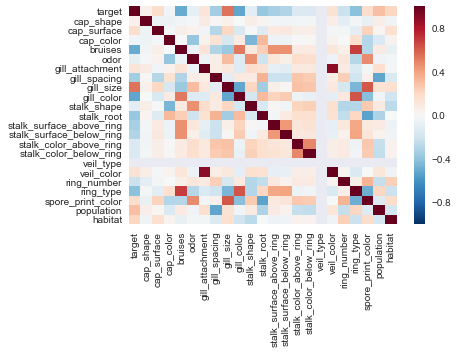

In [9]:
plt.figure()
sns.heatmap(data.corr())

In [10]:
#split the data 
split = int(0.8*data.shape[0])

training_data = data[:split]
testing_data = data[split:]

print training_data.shape, testing_data.shape

(6499, 23) (1625, 23)


In [11]:
#split the columns
input_cols = list(data.columns.values)
input_cols.pop(0)
print input_cols

out_cols = ['target']
print out_cols

['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']
['target']


In [12]:
#split the features and labels for training data
training_data_x = training_data[input_cols]
training_data_y = training_data[out_cols]
print training_data_x.shape, training_data_y.shape

#split the features and labels for testing data
testing_data_x = testing_data[input_cols]
testing_data_y = testing_data[out_cols]
print testing_data_x.shape, testing_data_y.shape

(6499, 22) (6499, 1)
(1625, 22) (1625, 1)


In [13]:
#Build the decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(training_data_x, training_data_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [14]:
#predict classes for the testing data
clf.predict(testing_data_x)

array([1, 1, 1, ..., 0, 1, 0])

In [15]:
#accuracy for test data
clf.score(testing_data_x, testing_data_y)

0.99507692307692308